# Predicting heart disease using machine learning

then I need to write something like a purpose statement for this notebook

This notebook tries to figure out if a patient has heart disease or not based on data we got by using the different machine learning tools.

This was my purpose statement. 

the instructor's purpose statement:

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

## 1: Problem definition:
we try to determine the patterns in medical attributes to predict whether the patient have a heart disease or not

the instructor's:
In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2- Data:
we got our data from the UC Irvine:
https://archive.ics.uci.edu/dataset/45/heart+disease

the instructor's:

The original data came from the Cleavland data from the UCI Machine Learning Repository

There is also a version of it available on Kaggle.

## 3- Evaluation (What defines success)
we will need a high rate of accuracy. So, less than 95% I will not accept this model

the instructor's:
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4- Features 
This where you'll get different information about each of the features in your data.
you can do this via doing your own research (such as looking at the links above) or by talking to as subject matter expert (someone who knows about the dataset).

 **Create data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
   -- Value 1: typical angina
   -- Value 2: atypical angina
   -- Value 3: non-anginal pain
   -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
   -- Value 1: upsloping
   -- Value 2: flat
   -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
* num: diagnosis of heart disease (angiographic disease status)
   -- Value 0: < 50% diameter narrowing
   -- Value 1: > 50% diameter narrowing

In [9]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear in the notebook
%matplotlib inline

# Model from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import RocCurveDisplay


# Load data

In [10]:
df = pd.read_csv("160 - heart-disease.csv")
df.shape # (rows,columns)

(303, 14)

# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1.What question(s) are you trying to solve?

2.What kind of data do we have and how do we treat different types?

3.What's missing from the data and how do you deal with it?

4.Where are the outliers and why should you care about them?

5.How can you add, change or remove features to get more out of your data?

In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

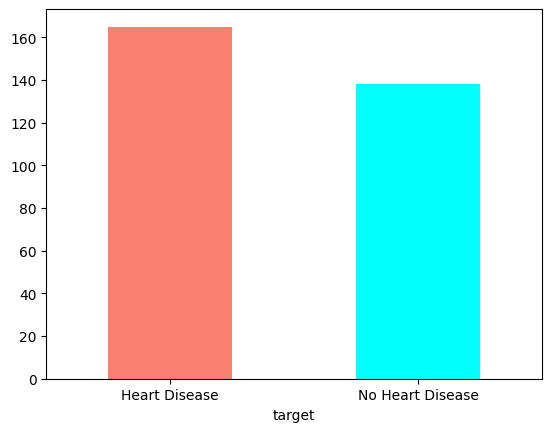

In [13]:
df["target"].value_counts().plot(kind="bar",color=["Salmon","cyan"])
plt.xticks(ticks=[0, 1], labels=["Heart Disease", "No Heart Disease"],
           fontdict={"fontsize": 10, "rotation": 0});

## Heart Disease Frequency according to Sex

In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


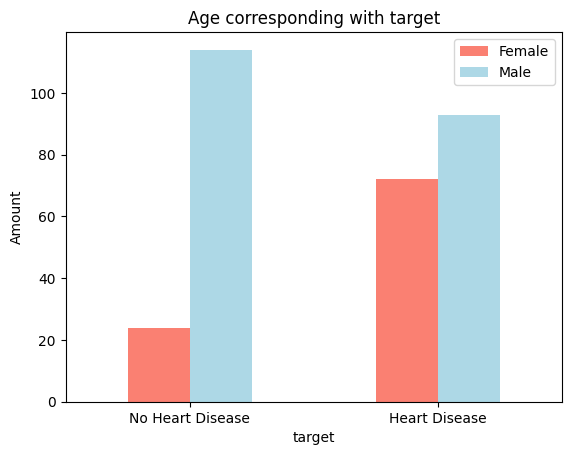

In [16]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"])
plt.title("Age corresponding with target")
plt.xticks(ticks=[0,1],labels=["No Heart Disease","Heart Disease"],fontdict={"rotation":0})
plt.legend(["Female","Male"])
plt.ylabel("Amount");

## Heart Disease Frequency according to the maximum heart rate (thalach)

In [17]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

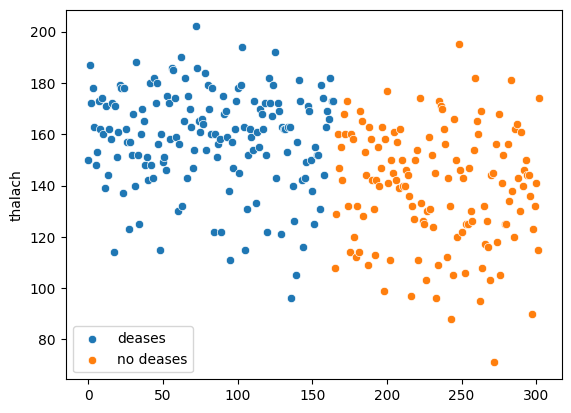

In [18]:
plt.figure()
sns.scatterplot(df["thalach"][df["target"]==1])
sns.scatterplot(df["thalach"][df["target"]==0])
plt.legend(["deases","no deases"])


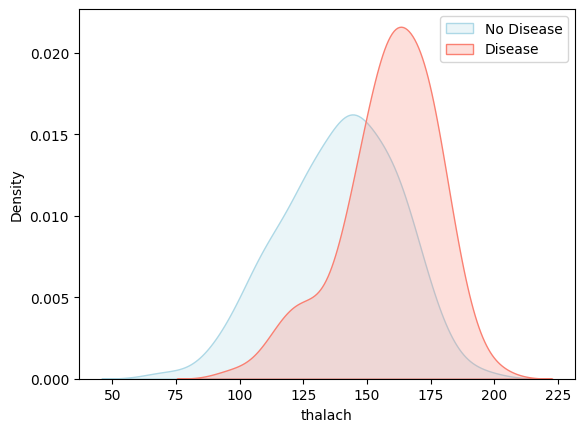

In [19]:
plt.figure()
sns.kdeplot(df["thalach"][df["target"]==0],fill=True,color="lightblue")
sns.kdeplot(df["thalach"][df["target"]==1],fill=True,color="salmon")
plt.legend(["No Disease","Disease"]);

# Age vs. Max Heart Rate for Heart Disease

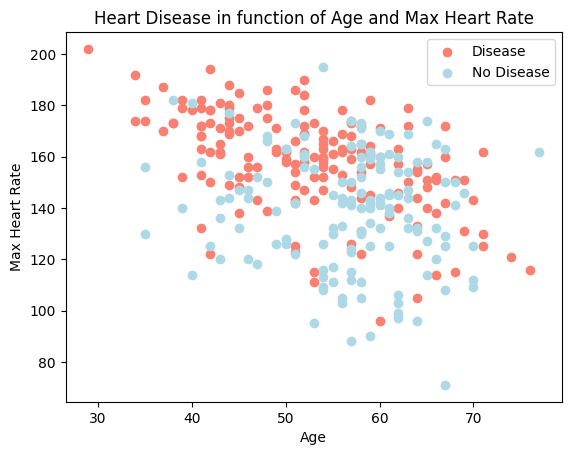

In [20]:
plt.figure()
plt.scatter (x= df["age"][df["target"]==1],y=df["thalach"][df["target"]==1],c="salmon")
plt.scatter (x= df["age"][df["target"]==0],y=df["thalach"][df["target"]==0],c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend (["Disease","No Disease"]);

In [21]:
df[df["age"]<30]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [22]:
df.thalach[df["target"]==0]

165    108
166    129
167    160
168    147
169    155
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 138, dtype: int64

## Heart Disease Frequency  per Chest Pain Type

 cp: chest pain type 
 --Value 1: typical angina (chest pain-related decrease blood supply to the heart)
 -- Value 2: atypical angina (chest pain not related to heart)
 -- Value 3: non-anginal pain (typically esophageal spasms (non-heart related))
 -- Value 4: asymptomatic (chest pain not showing signs of disease)

In [23]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


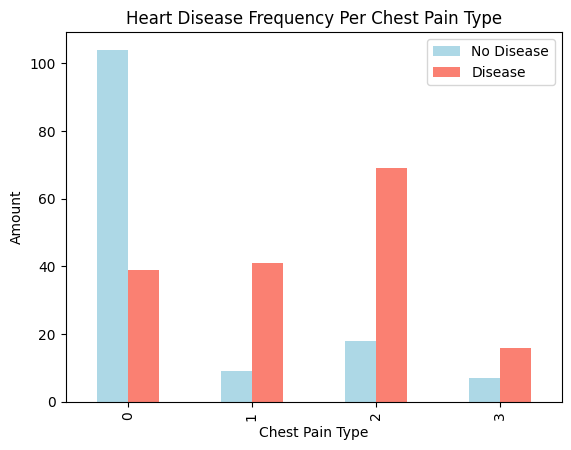

In [24]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["lightblue","salmon"])
plt.ylabel("Amount")
plt.xlabel("Chest Pain Type")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.legend (["No Disease","Disease"]);

## Correlated heat map

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


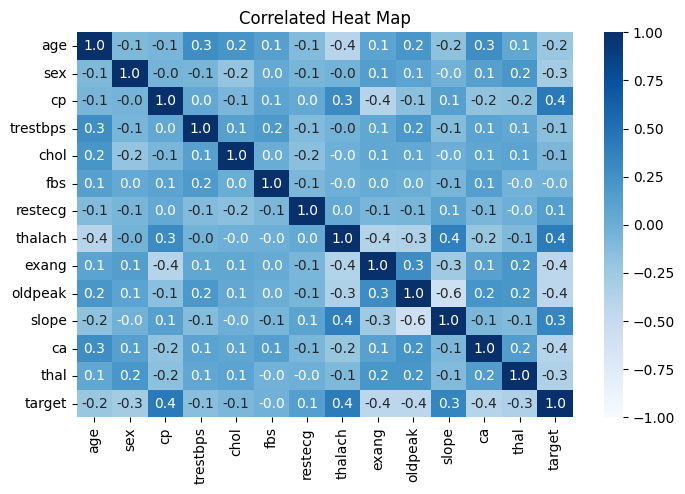

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap="Blues",vmin=-1,vmax=1,annot=True,fmt="0.1f")
plt.title("Correlated Heat Map");

## Machine Learning Model

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=df.drop("target",axis=1)
y=df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {"RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression()
          ,"SVC":SVC(),"KNN":KNeighborsClassifier()}
def my_models (model,X_train,X_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    models_scores= pd.DataFrame(model_scores,index=["score"]).T
    print(models_scores)

my_models(models,X_train_scaled,X_test_scaled,y_train,y_test)

                       score
RandomForest        0.868852
LogisticRegression  0.852459
SVC                 0.868852
KNN                 0.901639
